# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import json

## Load and display the data

In [4]:
#your code here

data = pd.read_csv("Tweets.csv")
print(data.columns)
print(data.count)

Y = pd.read_csv('ground_truth.csv', names=['label'])


#FEATURE SELECTION
X_content = data.reindex(columns=['text'])

X = data.reindex(columns=['id','entities','user_verified','retweet_count',
    'user_followers_count','user_friends_count','user_statuses_count','user_listed_count'])

print(X['entities'][0]) # exploration

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')
<bound method DataFrame.count of                            created_at            id        id_str  \
0      Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1      Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2      Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3      Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4      Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
...                               ...           ...           ...   
11094  Tue Jul 31 13:34:36 +0000 2018  1.024290e+18  1.024290e+18   
11095  Tue Jul 31 1

In [5]:
# X['entities'].apply(lambda row: len(json.load(row.replace("\'","\""))['hashtags']))
X = X.assign(hashtags=0)
for i in range(len(X)):
    try:
        X.loc[i,"hashtags"] = len(json.loads(X.loc[i,"entities"].replace('\'','\"'))["hashtags"])
    except Exception as e:
        print("Err:",i,end=", ")
        # x = 0
        continue

X.drop('entities', axis=1, inplace=True)


Err: 40, Err: 98, Err: 180, Err: 259, Err: 270, Err: 429, Err: 431, Err: 471, Err: 570, Err: 680, Err: 700, Err: 763, Err: 803, Err: 991, Err: 1012, Err: 1070, Err: 1163, Err: 1240, Err: 1311, Err: 1366, Err: 1367, Err: 1443, Err: 1677, Err: 1736, Err: 1770, Err: 1831, Err: 1929, Err: 1935, Err: 1950, Err: 2055, Err: 2224, Err: 2285, Err: 2292, Err: 2311, Err: 2324, Err: 2399, Err: 2433, Err: 2458, Err: 2531, Err: 2673, Err: 2685, Err: 2824, Err: 2961, Err: 2980, Err: 3052, Err: 3338, Err: 3356, Err: 3427, Err: 3465, Err: 3478, Err: 3570, Err: 3598, Err: 3690, Err: 3701, Err: 3706, Err: 3763, Err: 4062, Err: 4117, Err: 4122, Err: 4383, Err: 4445, Err: 4517, Err: 4633, Err: 4781, Err: 4789, Err: 4796, Err: 4880, Err: 4965, Err: 5012, Err: 5130, Err: 5224, Err: 5329, Err: 5375, Err: 5470, Err: 5563, Err: 5737, Err: 5881, Err: 5937, Err: 5979, Err: 6052, Err: 6215, Err: 6277, Err: 6347, Err: 6391, Err: 6428, Err: 6476, Err: 6500, Err: 6564, Err: 6567, Err: 6853, Err: 7031, Err: 7054, Err:

In [6]:

X['label'] = Y
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11099 non-null  float64
 1   user_verified         11099 non-null  bool   
 2   retweet_count         11099 non-null  int64  
 3   user_followers_count  11099 non-null  int64  
 4   user_friends_count    11099 non-null  int64  
 5   user_statuses_count   11099 non-null  int64  
 6   user_listed_count     11099 non-null  int64  
 7   hashtags              11099 non-null  int64  
 8   label                 11099 non-null  float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 704.7 KB


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [7]:
# your code here
print(X.columns)
print(X.isnull().values.any())
# print(X.where(X.hashtags > 0))
print(X['hashtags'][43])
print(X.head())
# print(X[X['hashtags'] > 0].count())

Index(['id', 'user_verified', 'retweet_count', 'user_followers_count',
       'user_friends_count', 'user_statuses_count', 'user_listed_count',
       'hashtags', 'label'],
      dtype='object')
False
2
             id  user_verified  retweet_count  user_followers_count  \
0  1.024290e+18          False            113                   153   
1  1.024290e+18          False           5902                   780   
2  1.024290e+18          False           3745                   255   
3  1.024290e+18          False             10                  2419   
4  1.024290e+18          False          25306                   314   

   user_friends_count  user_statuses_count  user_listed_count  hashtags  label  
0                 264                31308                  7         0    0.0  
1                 382                87272                 12         1    0.0  
2                 246                 1731                  1         0    1.0  
3                2428                 2153    

## Part-1
*Vectorize tweets using only meta data*

In [8]:
#PREPROCESSING
for col in ['retweet_count','user_followers_count','user_friends_count',\
        'user_statuses_count','user_listed_count','hashtags']:
    X[col] = (X[col]-X[col].mean())/X[col].std()

X['user_verified'] = X['user_verified'].apply(lambda row: float(row))
print(X.head())

# print(type(X['user_verified'][0]))

             id  user_verified  retweet_count  user_followers_count  \
0  1.024290e+18            0.0      -0.218795             -0.029090   
1  1.024290e+18            0.0       0.256486             -0.025975   
2  1.024290e+18            0.0       0.079395             -0.028583   
3  1.024290e+18            0.0      -0.227251             -0.017834   
4  1.024290e+18            0.0       1.849567             -0.028290   

   user_friends_count  user_statuses_count  user_listed_count  hashtags  label  
0           -0.154112            -0.038906          -0.156960 -0.308999    0.0  
1           -0.138679             0.591380          -0.137348  1.157258    0.0  
2           -0.156467            -0.372013          -0.180493 -0.308999    1.0  
3            0.128913            -0.367260          -0.168727 -0.308999    0.0  
4           -0.094211            -0.014185          -0.156960 -0.308999    1.0  


In [9]:
X_meta = X.iloc[:,1:8].values

print(X_meta.shape)  #Vectorized

(11099, 7)


In [37]:

"""
Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_meta, Y, test_size=0.25)

# X_train, 

In [38]:
# y_train.reshaoe()
print(X_train.shape, np.squeeze(y_train).shape)

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)
y_train = y_train.to_numpy()

(8324, 7) (8324,)


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [39]:
# your code here

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

acc = []

for K in range(3,31,2):
    nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    y_pred = np.zeros(shape=y_test.shape)
    for sample,ind in enumerate(indices):
        ctr = {0:0,1:0}
        for i in ind:
            ctr[y_train[i]]+=1
        y_pred[sample] = 1 if ctr[0]<ctr[1] else 0
    
    acc.append(accuracy_score(y_test,y_pred))

print("Max Accuracy: ",max(acc))


Max Accuracy:  0.9607207207207207


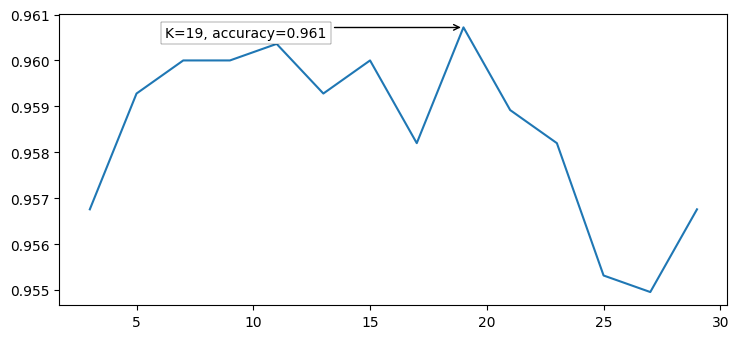

In [56]:

import matplotlib.pyplot as plt

K = range(3,31,2)

ymax = max(acc)
xmax = K[np.argmax(acc)]

fig, ax = plt.subplots()
ax.plot(K, acc)


text= "K={}, accuracy={:.3f}".format(xmax, ymax)
if not ax:
    ax=plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.22)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=30")
kw = dict(xycoords='data',textcoords="axes fraction",
            arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
ax.annotate(text, xy=(xmax, ymax), xytext=(0.4,0.96), **kw)

# annot_max(K,acc)
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import re
"""
Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
Following are the steps for be followed:
  1. Remove links, tags and hashtags from each tweet.
  2. Apply TF-IDF on the tweets to extract a vector. 
  3. Perform dimensionality reduction on the obtained vector. 
Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
"""
  # your code here

X_content = np.squeeze(X_content)
X_filtered = []
print(X_content[26])
for i,x in enumerate(X_content):
  x = ' '.join(re.sub("([^0-9A-Za-z\" \t])|(@[a-zA-Z0-9]+)|(RT)|(\w+:\/\/\S+)"," ",x).split())  # remove emojis/hashtags, tags and links
  X_filtered.append(x)

print(X_filtered[26])
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X_tfidf = tfidfvectorizer.fit_transform(X_filtered)
print(X_tfidf.shape)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_tfidf.toarray())
print(X_scaled.shape)

pca = PCA(n_components=100)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

RT @ABC: NEW: Alan Alda -- the Emmy Award-winning actor who starred in the long-running series "M.A.S.H." -- announces that he has Parkinsoâ€¦
ABC NEW Alan Alda the Emmy Award winning actor who starred in the long running series "M A S H " announces that he has Parkinso
(11099, 27677)
(11099, 27677)


In [64]:
print(X_pca.shape)
print(Y.shape)

(11099, 100)
(11099, 1)


Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [65]:
# your code here

X_normed = (X_pca - X_pca.min(0)) / X_pca.ptp(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normed, np.squeeze(Y), test_size=0.25)
print(X_train.shape)
y_train = y_train.to_numpy()


(8324, 100)


In [62]:
!pip install tqdm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 78.5/78.5 kB 1.1 MB/s eta 0:00:00


In [67]:
# print(indices.shape)
from tqdm import tqdm
text_acc = []
for K in tqdm(range(3,31,2)):
    nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    y_pred = np.zeros(shape=y_test.shape)
    for sample,ind in enumerate(indices):
        ctr = {0:0,1:0}
        for i in ind:
            ctr[y_train[i]]+=1
        y_pred[sample] = 1 if ctr[0]<ctr[1] else 0

    text_acc.append(accuracy_score(y_test,y_pred))

print("Max Accuracy: ",max(text_acc))
# score = 0
# total = len(y_test)
# for i in range(total):
#     if (y_train[i]==y_pred[i]):
#         score+=1

# print(score/total)

100%|██████████| 14/14 [00:38<00:00,  2.75s/it]

Max Accuracy:  0.9264864864864865


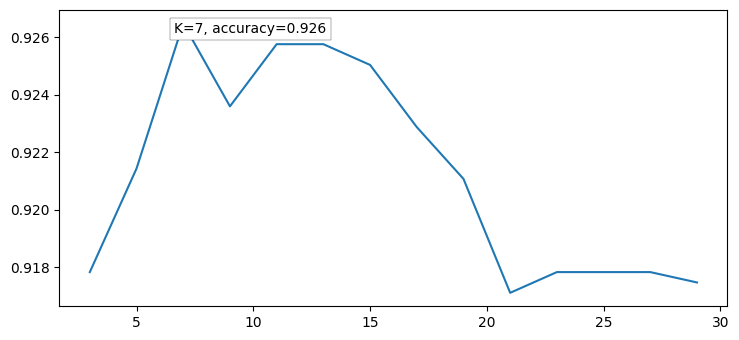

In [69]:
# Plotting accuracy

K = range(3,31,2)
ymax = max(text_acc)
xmax = K[np.argmax(text_acc)]

fig, ax = plt.subplots()
ax.plot(K, text_acc)


text= "K={}, accuracy={:.3f}".format(xmax, ymax)
if not ax:
    ax=plt.gca()
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.22)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=30")
kw = dict(xycoords='data',textcoords="axes fraction",
            arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
ax.annotate(text, xy=(xmax, ymax), xytext=(0.4,0.96), **kw)

# annot_max(K,acc)
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [70]:
# your code here
#We observe that features on the metadata give better accuracy, we take K=3 from the above experiments
# X_meta --> samples with metadata as features, X_normed --> samples with text vector as features

print(X_meta.shape, X_normed.shape)
#further dimensionality reduction on text to make lower weightage
pca = PCA(n_components=15)
pca.fit(X_normed)
X_text = pca.transform(X_normed)
print(X_text.shape)


(11099, 7) (11099, 100)
(11099, 15)


In [71]:
X_combined = np.concatenate((X_text,X_meta),axis=1)
print(X_combined.shape)

(11099, 22)


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [79]:
# your code here

y_combined = np.squeeze(Y)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.25)
# since both types of KNN have local peaks at 12, we choose K=12
nbrs = NearestNeighbors(n_neighbors=12, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_test)
y_train = y_train.to_numpy()
y_pred = np.zeros(shape=y_test.shape)

for sample,ind in enumerate(indices):
    ctr = {0:0,1:0}
    for i in ind:
        ctr[y_train[i]]+=1
    y_pred[sample] = 1 if ctr[0]<ctr[1] else 0


# score = 0
# total = len(y_test)
# for i in range(total):
#     if (y_test[i]==y_pred[i]):
#         score+=1

print(f"K=12, Accuracy = {accuracy_score(y_test,y_pred)*100:.3f}%")

#CHOSEN K-value = 3

K=12, Accuracy = 96.216%


### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

The feature variables such as retweet counts and user follower counts have a more significant influence on whether the tweet is likely to be popular or not. Thus using the metadata gives a higher accuracy in the classification. Also for lower value of K it gives higher accuracy, likely because there are only 2 classes and several features in the data, higher number of neighbours likely makes the training more noisy.